# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import plotly.express as px

%matplotlib inline

In [2]:
diamonds = pd.read_csv('diamonds_clean.csv')
diamonds = diamonds.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)

Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [3]:
#your code here
desc = diamonds[['price', 'color']].groupby(['color']).describe()
desc.columns
desc['IQR'] = desc['price',   '75%'] - desc['price',   '25%']
desc['coeff of variation'] = desc['price',   'std'] / desc['price',   'mean']
desc.transpose()
#Diamond colour, from J (worst) to D (best)

color                                D             E             F  \
price              count   6775.000000   9797.000000   9542.000000   
                   mean    3169.954096   3076.752475   3724.886397   
                   std     3356.590935   3344.158685   3784.992007   
                   min      357.000000    326.000000    342.000000   
                   25%      911.000000    882.000000    982.000000   
                   50%     1838.000000   1739.000000   2343.500000   
                   75%     4213.500000   4003.000000   4868.250000   
                   max    18693.000000  18731.000000  18791.000000   
IQR                        3302.500000   3121.000000   3886.250000   
coeff of variation            1.058877      1.086912      1.016136   

color                                G             H             I  \
price              count  11292.000000   8304.000000   5422.000000   
                   mean    3999.135671   4486.669196   5091.874954   
                   std     4051.102846   4215.944171   4722.387604   
                   min      354.000000    337.000000    334.000000   
                   25%      931.000000    984.000000   1120.500000   
                   50%     2242.000000   3460.000000   3730.000000   
                   75%     6048.000000   5980.250000   7201.750000   
                   max    18818.000000  18803.000000  18823.000000   
IQR                        5117.000000   4996.250000   6081.250000   
coeff of variation            1.012995      0.939660      0.927436   

color                                J  
price              count   2808.000000  
                   mean    5323.818020  
                   std     4438.187251  
                   min      335.000000  
                   25%     1860.500000  
                   50%     4234.000000  
                   75%     7695.000000  
                   max    18710.000000  
IQR                        5834.500000  
coeff of variation            0.833647

>**My comment**: **At first glance we see that for the best color(D) mean and 75th percentile of price is lower than
that of the worst color(J). Based on coefficient of variation, the price is fairly equally varible, with the lowesr coefficient of variation produced for color J (36.2%) and highest for color H (39.4%)*

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [4]:
#my assumption are clarity, table, carat, depth will impact price because they indicate quality, size 
#and symmetry of the diamond

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [5]:
#your code here
diamonds.groupby('color').mean()

carat      depth      table        price         x         y  \
color                                                                    
D      0.657795  61.698125  57.404590  3169.954096  5.417851  5.421928   
E      0.657867  61.662090  57.491201  3076.752475  5.411580  5.416949   
F      0.736538  61.694582  57.433536  3724.886397  5.616727  5.620529   
G      0.771190  61.757111  57.288629  3999.135671  5.678549  5.681198   
H      0.911799  61.836850  57.517811  4486.669196  5.984776  5.981484   
I      1.026927  61.846385  57.577278  5091.874954  6.222826  6.222730   
J      1.162137  61.887215  57.812393  5323.818020  6.519338  6.518105   

              z  clarity_rec  color_rec   cut_rec  
color                                              
D      3.343320     2.691513        6.0  2.927380  
E      3.337767     2.969889        5.0  2.894355  
F      3.465938     3.133934        4.0  2.885559  
G      3.507966     3.463425        3.0  2.991233  
H      3.699147     2.933646        2.0  2.876927  
I      3.846369     2.964035        1.0  2.874585  
J      4.033251     2.776353        0.0  2.731838

**What do you see? Pay special attention to the relationship between price and color.**

>**My comment**: **So far no clear relationship between price and color - D is the best color but has the lowest price*

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

In [6]:
#your code here
px.histogram(
    diamonds.sort_values(['color'], ascending = False), 
    x = "color", 
    height = 500, 
    width = 600, 
    title = 'Color frequency distribution',
    nbins = 50
)

>**My comment**: **We see that most of the diamonds are from mid to high quality color*

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [7]:
diamonds['carat_bins']= pd.qcut(diamonds['carat'],10, duplicates = 'drop')
diamonds.groupby('carat_bins')['carat_bins'].count()

carat_bins
(0.199, 0.31]    6452
(0.31, 0.35]     4606
(0.35, 0.42]     5421
(0.42, 0.53]     5106
(0.53, 0.7]      5577
(0.7, 0.9]       6440
(0.9, 1.01]      5078
(1.01, 1.13]     4573
(1.13, 1.51]     6052
(1.51, 5.01]     4635
Name: carat_bins, dtype: int64

In [8]:
#your code here
diamonds.groupby('carat_bins').mean()

carat      depth      table         price         x  \
carat_bins                                                              
(0.199, 0.31]  0.292461  61.767297  57.018273    655.294017  4.263985   
(0.31, 0.35]   0.330877  61.641316  56.707534    750.733174  4.452505   
(0.35, 0.42]   0.395547  61.681166  57.008781    922.498432  4.716373   
(0.42, 0.53]   0.497004  61.748081  57.172464   1486.054642  5.085405   
(0.53, 0.7]    0.621343  61.611601  57.363762   2090.247266  5.474628   
(0.7, 0.9]     0.785121  61.855543  57.610109   3095.992857  5.901931   
(0.9, 1.01]    0.986130  61.995648  58.326152   5039.209137  6.354834   
(1.01, 1.13]   1.062543  61.626810  57.529915   5825.012683  6.555521   
(1.13, 1.51]   1.311859  61.785707  57.813219   7944.263714  7.007425   
(1.51, 5.01]   1.859886  61.735297  58.062481  12936.278317  7.862450   

                      y         z  clarity_rec  color_rec   cut_rec  
carat_bins                                                           
(0.199, 0.31]  4.276215  2.637094     4.144606   3.740856  3.034408  
(0.31, 0.35]   4.458908  2.746001     3.820669   3.641554  3.326965  
(0.35, 0.42]   4.725905  2.911710     3.617229   3.803726  3.146283  
(0.42, 0.53]   5.092538  3.141940     3.277517   3.933999  2.956130  
(0.53, 0.7]    5.481971  3.374431     3.121750   3.730859  2.938139  
(0.7, 0.9]     5.908872  3.652258     2.654193   3.467702  2.737422  
(0.9, 1.01]    6.349360  3.937032     2.371997   3.568531  2.310752  
(1.01, 1.13]   6.552625  4.037965     2.506014   3.227859  3.016619  
(1.13, 1.51]   6.997185  4.325478     2.643258   2.637145  2.832948  
(1.51, 5.01]   7.848623  4.848644     2.132470   2.181661  2.784466

>**My comment**: **Based on analysis of means there is evidence of a positive relationship between price and carat*


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

In [9]:
px.histogram(
    diamonds, 
    x = "carat", 
    height = 500, 
    width = 600, 
    title = 'Carat frequency distribution',
    nbins = 50
)

# 3. The `table`, `clarity`,`depth` , `cut` columns
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [10]:
#your code here
diamonds['table_bins']= pd.qcut(diamonds['table'],10, duplicates = 'drop')
diamonds.groupby('table_bins')['table_bins'].count()

table_bins
(42.999, 55.0]     9843
(55.0, 56.0]      10045
(56.0, 57.0]       9843
(57.0, 58.0]       8450
(58.0, 59.0]       6621
(59.0, 60.0]       4292
(60.0, 95.0]       4846
Name: table_bins, dtype: int64

In [11]:
diamonds.groupby('table_bins').mean()

carat      depth      table        price         x  \
table_bins                                                              
(42.999, 55.0]  0.664242  62.175912  54.564736  3065.897795  5.391862   
(55.0, 56.0]    0.712471  61.971638  55.991558  3385.945844  5.530330   
(56.0, 57.0]    0.785997  61.920238  56.993274  3885.601341  5.706766   
(57.0, 58.0]    0.864846  61.830876  57.995065  4407.015503  5.887021   
(58.0, 59.0]    0.894354  61.578840  58.995877  4606.695816  5.958296   
(59.0, 60.0]    0.925841  61.234786  59.994525  4869.279357  6.038166   
(60.0, 95.0]    0.909249  60.622225  62.025031  4345.981015  6.041684   

                       y         z  clarity_rec  color_rec   cut_rec  
table_bins                                                            
(42.999, 55.0]  5.404036  3.356697     3.415727   3.435741  3.403637  
(55.0, 56.0]    5.537755  3.430252     3.296665   3.532703  3.337183  
(56.0, 57.0]    5.712136  3.535513     3.106980   3.428731  3.213350  
(57.0, 58.0]    5.886427  3.640518     2.886627   3.337870  2.551716  
(58.0, 59.0]    5.953913  3.667857     2.823592   3.303580  2.543573  
(59.0, 60.0]    6.030793  3.695928     2.695014   3.363467  2.476701  
(60.0, 95.0]    6.027959  3.657949     2.600083   3.330995  1.849154

>**My comment:** **The mean price increases with table increase only untill a certain table bin and then drops for highest table values, this can indicate that the relationship between table and price is non linear or weak*

**Finally, do the same with the `clarity` column.**

In [12]:
#your code here
diamonds.groupby('clarity')['clarity'].count()

clarity
I1        741
IF       1790
SI1     13065
SI2      9194
VS1      8171
VS2     12258
VVS1     3655
VVS2     5066
Name: clarity, dtype: int64

In [13]:
diamonds.groupby('clarity_rec').mean()

carat      depth      table        price         x         y  \
clarity_rec                                                                    
0            1.283846  62.734278  58.303779  3924.168691  6.761093  6.709379   
1            1.077648  61.772167  57.927181  5063.028606  6.404157  6.395579   
2            0.850482  61.853042  57.662541  3996.001148  5.888383  5.888256   
3            0.763935  61.724417  57.417401  3924.989395  5.658633  5.659782   
4            0.727158  61.667458  57.315151  3839.455391  5.572860  5.580017   
5            0.596202  61.663778  57.024990  3283.737071  5.218454  5.232118   
6            0.503321  61.624651  56.884460  2523.114637  4.961721  4.976437   
7            0.505123  61.510615  56.507207  2864.839106  4.968402  4.989827   

                    z  color_rec   cut_rec  
clarity_rec                                 
0            4.224688   2.968961  1.974359  
1            3.952642   3.469980  2.666957  
2            3.640636   3.448450  2.747264  
3            3.492788   3.494208  2.978871  
4            3.437925   3.161792  3.000979  
5            3.221465   3.569483  3.116857  
6            3.062132   3.351573  3.228454  
7            3.061659   3.101676  3.432961

>**My comment**: **Relationship between clarity and price not clear - price level are volatile compared to ordered clarity*

**Finally, do the same with the `depth` column.**

In [14]:
diamonds['depth_bins']= pd.qcut(diamonds['depth'],10, duplicates = 'drop')
diamonds.groupby('depth_bins')['depth_bins'].count()

depth_bins
(42.999, 60.0]    5625
(60.0, 60.8]      5671
(60.8, 61.2]      4953
(61.2, 61.6]      6878
(61.6, 61.8]      3981
(61.8, 62.1]      6422
(62.1, 62.4]      5771
(62.4, 62.7]      4366
(62.7, 63.3]      5386
(63.3, 79.0]      4887
Name: depth_bins, dtype: int64

In [15]:
diamonds.groupby('depth_bins').mean()

carat      depth      table        price         x  \
depth_bins                                                              
(42.999, 60.0]  0.881760  59.067893  59.742044  4459.456178  6.058149   
(60.0, 60.8]    0.807653  60.490813  58.295080  4128.642920  5.803208   
(60.8, 61.2]    0.743953  61.061498  57.571613  3658.805774  5.631615   
(61.2, 61.6]    0.725608  61.458753  57.023859  3573.123437  5.565534   
(61.6, 61.8]    0.726318  61.752173  56.756318  3539.967596  5.555576   
(61.8, 62.1]    0.743203  61.997773  56.607505  3635.567580  5.584706   
(62.1, 62.4]    0.795438  62.295720  56.773055  4000.128920  5.693187   
(62.4, 62.7]    0.829869  62.594114  57.091984  4204.111544  5.773926   
(62.7, 63.3]    0.831378  63.013108  57.282083  4084.752692  5.764367   
(63.3, 79.0]    0.914557  64.281461  57.363475  4104.488439  5.920139   

                       y         z  clarity_rec  color_rec   cut_rec  
depth_bins                                                            
(42.999, 60.0]  6.054317  3.577859     2.779022   3.532089  2.331556  
(60.0, 60.8]    5.805712  3.510095     3.083054   3.494093  3.020455  
(60.8, 61.2]    5.637872  3.440543     3.287704   3.499495  3.273975  
(61.2, 61.6]    5.574150  3.423153     3.322041   3.464815  3.430794  
(61.6, 61.8]    5.566463  3.433980     3.380306   3.436071  3.457674  
(61.8, 62.1]    5.591867  3.464172     3.314232   3.367331  3.473528  
(62.1, 62.4]    5.698154  3.548149     3.174147   3.310691  3.345174  
(62.4, 62.7]    5.776656  3.615034     2.947778   3.284700  3.163307  
(62.7, 63.3]    5.763115  3.631617     2.751578   3.349610  2.313405  
(63.3, 79.0]    5.901519  3.801945     2.368324   3.288316  1.011254

>**My comment**: **Relationship between depth and price is not clear - price level are volatile compared to depth. Possible that non-linear relationshop exists*

**Finally, do the same with the `cut` column.**

In [16]:
diamonds.groupby('cut_rec').mean()

carat      depth      table        price         x         y  \
cut_rec                                                                    
0        1.046137  64.041677  59.053789  4358.757764  6.250777  6.186495   
1        0.849185  62.365879  58.694639  3928.864452  5.841166  5.853130   
2        0.806381  61.818275  57.956150  3981.759891  5.741171  5.770503   
3        0.891955  61.264673  58.746095  4584.257704  5.974754  5.942867   
4        0.702837  61.709401  55.951668  3457.541970  5.507962  5.519339   

                z  clarity_rec  color_rec  
cut_rec                                    
0        3.985245     2.021739   3.148447  
1        3.643072     2.602935   3.426824  
2        3.557726     2.999338   3.433455  
3        3.650557     2.739613   3.302661  
4        3.401952     3.458169   3.470744

>****My comment**: **Relationship between cut and price unclear*

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

>****My comment**: **My assumptions were that clarity, table, carat, depth will impact price because they indicate quality, size 
and symmetry of the diamond. Out of those, we found a positive relatiobship between carat and price. Relationship for table, clarity and depth are not entirely clear. There is an indication that there might be non-lineqar relationship with table and depth*

# Bonus: taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


In [17]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'clarity_rec', 'color_rec', 'cut_rec', 'carat_bins', 'table_bins',
       'depth_bins'],
      dtype='object')

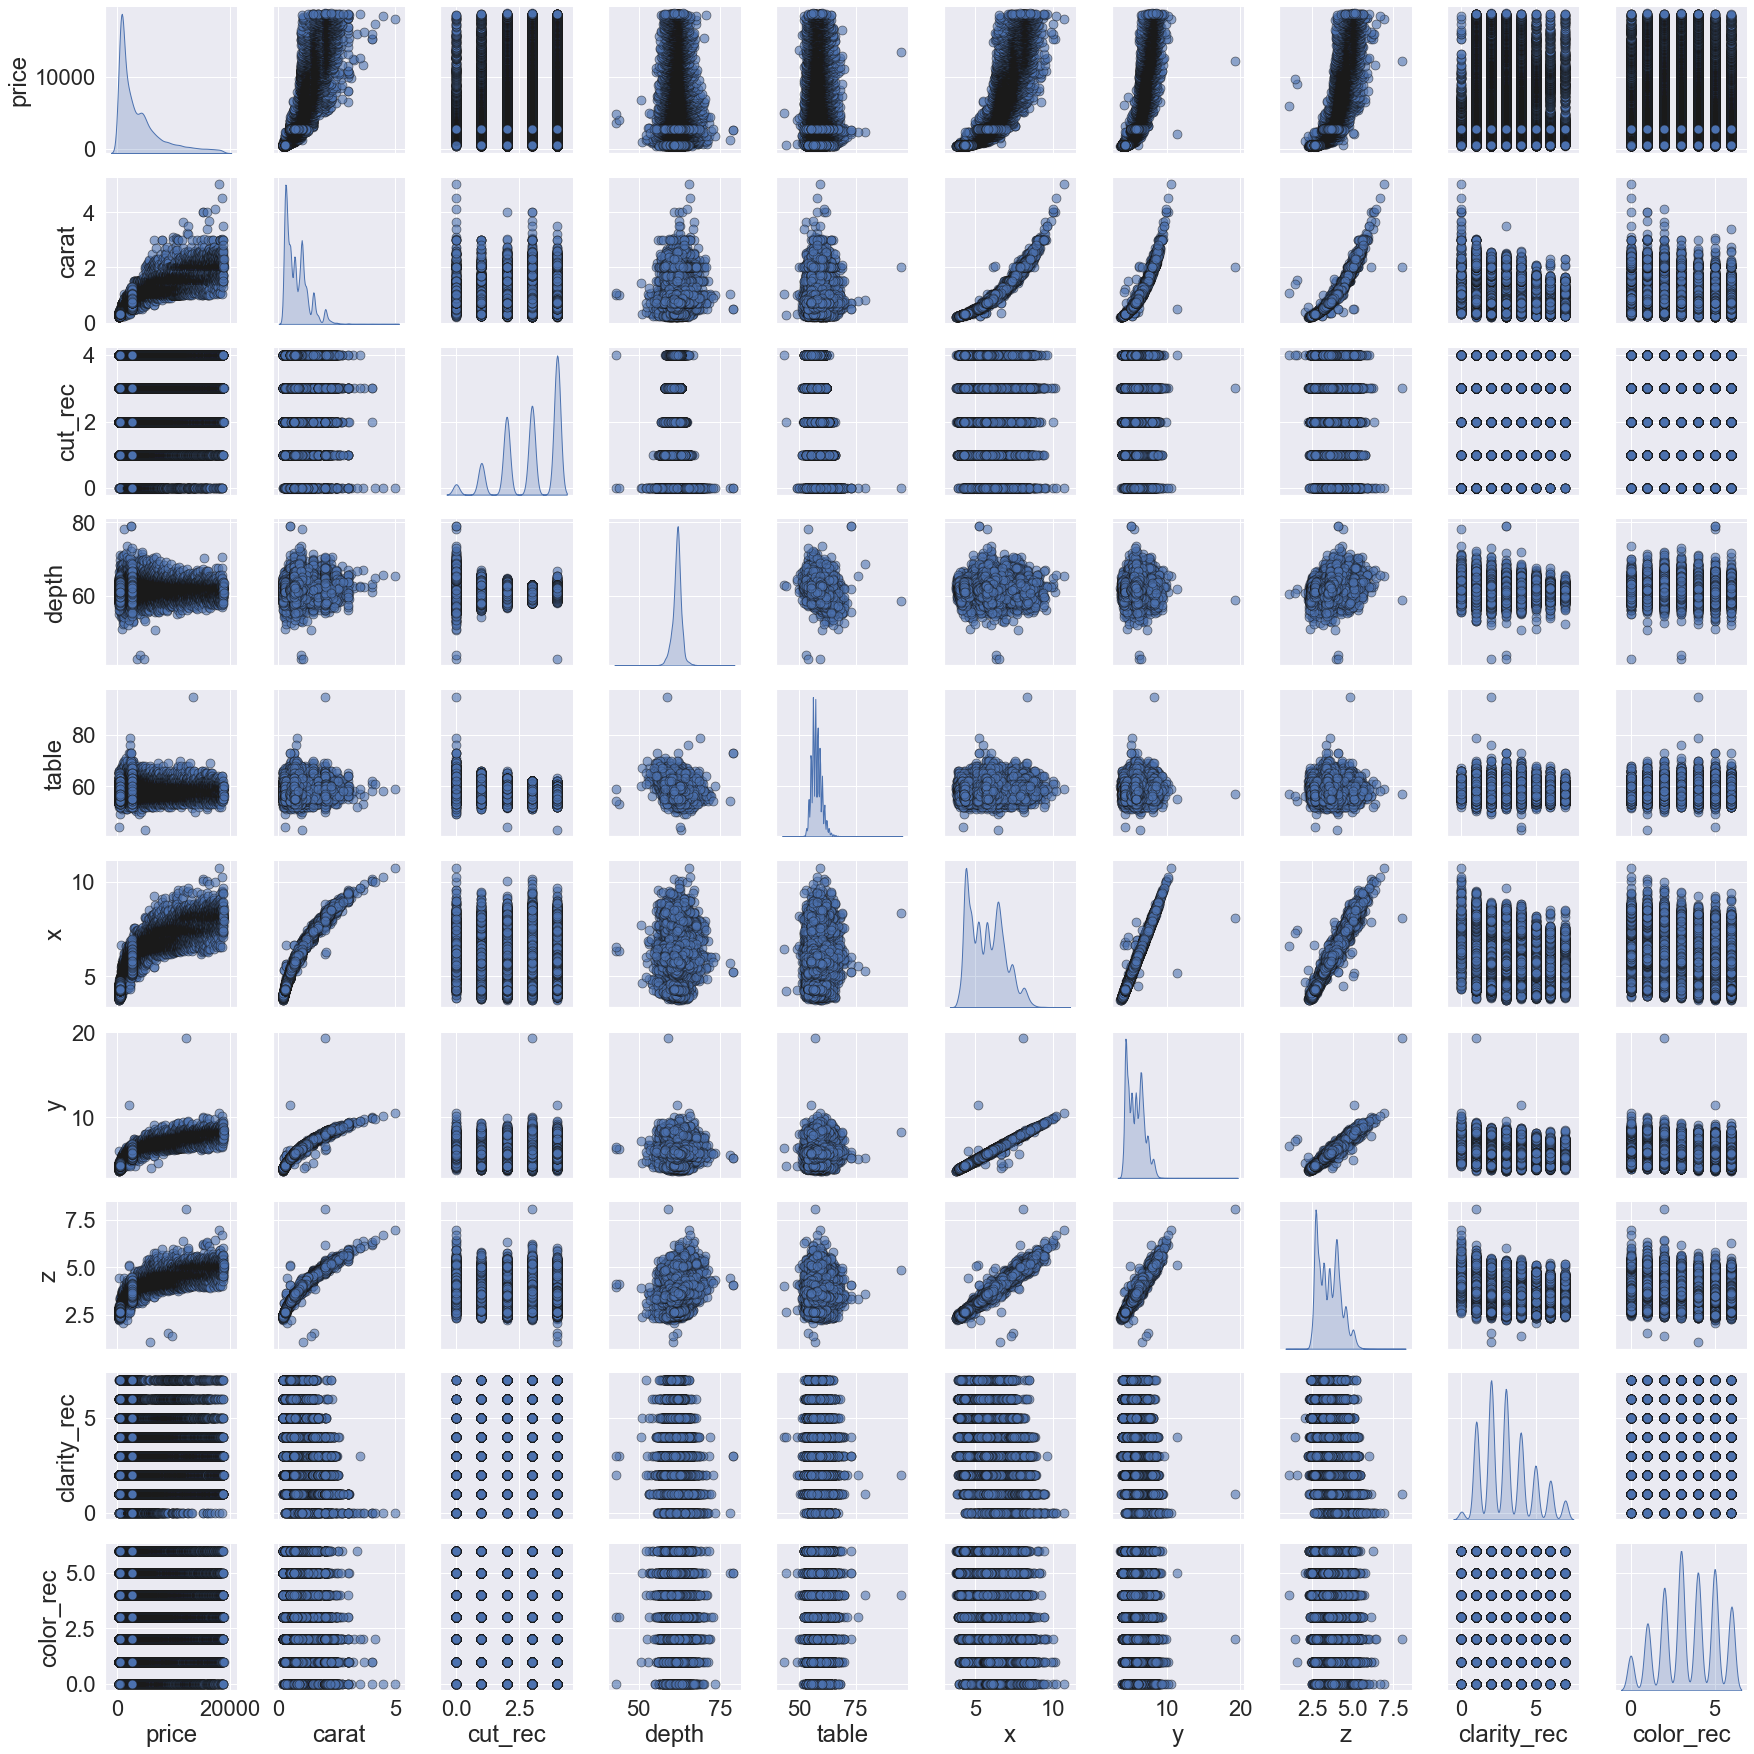

In [18]:
#Run this code
import seaborn as sns

sns.set(font_scale=2)

sns.pairplot(
    diamonds[['price', 'carat', 'cut_rec', 'depth', 'table', 'x', 'y', 'z', 'clarity_rec', 'color_rec']], 
    diag_kind = 'kde', 
    plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}
)

**What do you see here? What relationships between variables are the most interesting?**

>**My comment**: **There seems to be positive linear relationship between price and carat; non-linear relationship between price and x, y, z; table, depth, clarity, color and cut do not show relationship visually*

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

In [19]:
diamonds[['price', 'carat', 'cut_rec', 'depth', 'table', 'x', 'y', 'z', 'clarity_rec', 'color_rec']].corr()

price     carat   cut_rec     depth     table         x  \
price        1.000000  0.921591 -0.053491 -0.010647  0.127134  0.887227   
carat        0.921591  1.000000 -0.134967  0.028224  0.181618  0.977765   
cut_rec     -0.053491 -0.134967  1.000000 -0.218055 -0.433405 -0.126272   
depth       -0.010647  0.028224 -0.218055  1.000000 -0.295779 -0.025097   
table        0.127134  0.181618 -0.433405 -0.295779  1.000000  0.196130   
x            0.887227  0.977765 -0.126272 -0.025097  0.196130  1.000000   
y            0.887764  0.975719 -0.125583 -0.028549  0.189525  0.997427   
z            0.881924  0.976256 -0.152391  0.096379  0.155810  0.990827   
clarity_rec -0.146800 -0.352841  0.189175 -0.067384 -0.160327 -0.373009   
color_rec   -0.172511 -0.291437  0.020519 -0.047279 -0.026465 -0.270780   

                    y         z  clarity_rec  color_rec  
price        0.887764  0.881924    -0.146800  -0.172511  
carat        0.975719  0.976256    -0.352841  -0.291437  
cut_rec     -0.125583 -0.152391     0.189175   0.020519  
depth       -0.028549  0.096379    -0.067384  -0.047279  
table        0.189525  0.155810    -0.160327  -0.026465  
x            0.997427  0.990827    -0.373009  -0.270780  
y            1.000000  0.990381    -0.367265  -0.270218  
z            0.990381  1.000000    -0.376497  -0.274974  
clarity_rec -0.367265 -0.376497     1.000000  -0.025631  
color_rec   -0.270218 -0.274974    -0.025631   1.000000

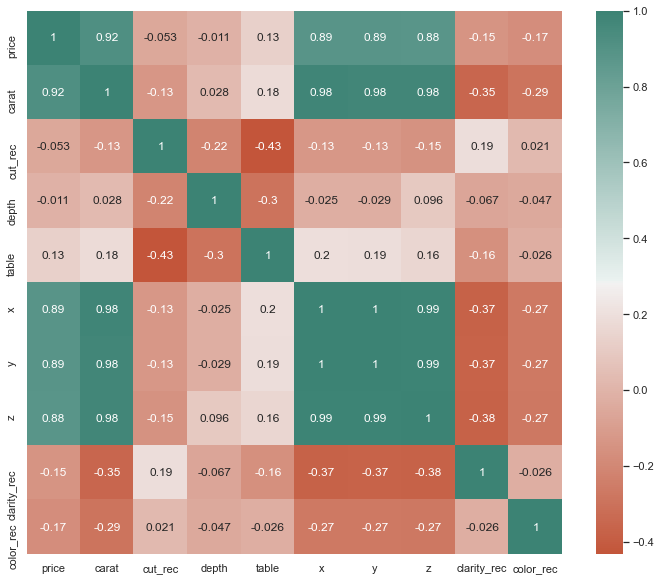

In [20]:
#Run this code

sns.set(font_scale=1)

plt.figure(figsize = (12,10))
cmap = sns.diverging_palette(20, 170, as_cmap=True)
sns.heatmap(diamonds[['price', 'carat', 'cut_rec', 'depth', 'table', 'x', 'y', 'z', 'clarity_rec', 'color_rec']].corr(), annot =  True, annot_kws={"size":12}, cmap = cmap)

**What do you see here? Regarding the results before, does it fit with them?**

>**My comment**: **There seems to be positive linear relationship between price and carat  confirmed, correlation is 0.92; there seems to be non-linear relationship between price and x, y,z - linear correlation is strong as well; table, depth, clarity, color and cut do not show relationship visually - confirmed - coeeficients of correlations are weak*

In [21]:
#Let us check Spearman (non-linear correlation)

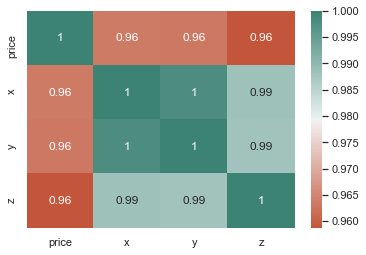

In [22]:
#strong relationship of x,y,z with prce confirmed as well

sns.set(font_scale=1)

plt.figure(figsize = (6,4))
cmap = sns.diverging_palette(20, 170, as_cmap=True)
sns.heatmap(diamonds[['price', 'x', 'y', 'z']].corr('spearman'), annot =  True, annot_kws={"size":12}, cmap = cmap)

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

C:\Users\irina\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



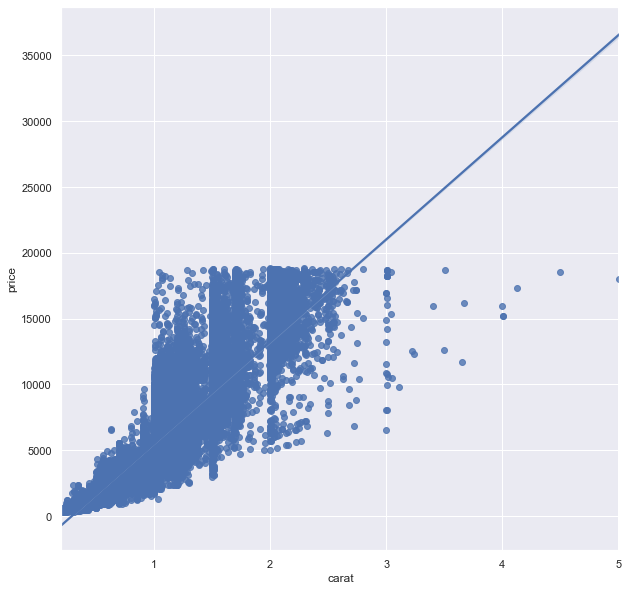

In [23]:
#Run this code
plt.figure(figsize=(10, 10))
sns.regplot(diamonds.carat, diamonds.price, scatter=True)


In [24]:
#Run this code
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(diamonds.carat, diamonds.price)
r2 = r_value ** 2
r2

0.8493305264354754

**What do you think?**


>**R2 is high, 85% of variance in price is explained by carat.**


**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [25]:
import statsmodels.api as sm

>**Based on the visual there are other factors - carat is not very comapct around the price line. We get strong linear relationship in part due to high number of observations. Let us check x, y,z - all highly correlated between each other, however let us proceed with checking each three cases**

In [26]:
###x
X = diamonds[diamonds['x'].isnull() == False]['x']
Y = diamonds[diamonds['x'].isnull() == False]['price']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
reg = model.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                 1.995e+05
Date:                Thu, 05 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:58:58   Log-Likelihood:            -4.8196e+05
No. Observations:               53932   AIC:                         9.639e+05
Df Residuals:                   53930   BIC:                         9.640e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.418e+04     41.332   -343.196      0.0

In [27]:
###y
X = diamonds[diamonds['y'].isnull() == False]['y']
Y = diamonds[diamonds['y'].isnull() == False]['price']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
reg = model.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                 2.006e+05
Date:                Thu, 05 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:58:58   Log-Likelihood:            -4.8184e+05
No. Observations:               53932   AIC:                         9.637e+05
Df Residuals:                   53930   BIC:                         9.637e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.431e+04     41.482   -344.891      0.0

In [28]:
###z
X = diamonds[diamonds['z'].isnull() == False]['z']
Y = diamonds[diamonds['z'].isnull() == False]['price']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
reg = model.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                 1.888e+05
Date:                Thu, 05 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:58:58   Log-Likelihood:            -4.8313e+05
No. Observations:               53932   AIC:                         9.663e+05
Df Residuals:                   53930   BIC:                         9.663e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.406e+04     42.197   -333.217      0.0

>**My comment:** **based on the R2 x,y,z have less predicitive power than carat*

**Conlcusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.

>**My comment**: It can be concluded that only clarity, x, y and z play have improtance in determining prirce of a diamond.  While dimensions have high explamatory power and high correlations with price, carat seems to have the highest predictive power. Although there are some differences in prices for different color, clarity, table, depth, cut, they don't have much explanaroty power based on correlation analysis*